# Preamble

In [1]:
%load_ext autoreload
%autoreload 2

# disable parallelization for BLAS and co.
from nalabtools.utils.parallelization import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)

# general
import re
import collections
import pickle

# data
import numpy as np
import pandas as pd

# ml / stats
import sklearn
import statsmodels.stats.multitest

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nalab
import nalabtools

# init notebook files
import nalabtools.utils.misc
nb = nalabtools.utils.misc.NotebookContext("martin_001_deepinsight")

# Correlation vs. p-value


In [3]:
import scipy.stats
def sample_pearson(c=1, n_data=100, n_samples=100):
    for i in range(n_samples):
        data = np.random.multivariate_normal((0,0), np.array([[1,c],[c,1]]), n_data)
        yield scipy.stats.pearsonr(data[:,0], data[:,1])

def sample_values(n_c, n_samples, n_data):

    values = np.empty((n_c * n_samples, 3))
    for i_c, c in enumerate(np.linspace(0,1, n_c)):
        for i_r, (r, p) in enumerate(sample_pearson(c=c, n_data=n_data, n_samples=n_samples)):
            values[i_c * n_samples + i_r, :] = c, r, p
    return values

def sample_df(values):
    df = pd.DataFrame(values, columns=["c", "r", "p"])
    mean = df.groupby("c").mean()
    std = df.groupby("c").std()
    return mean, std


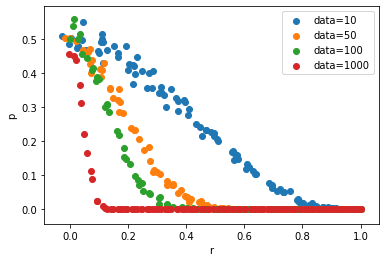

In [4]:
m1, s1 = sample_df(sample_values(n_c=100, n_samples=100, n_data=10))
m2, s2 = sample_df(sample_values(n_c=100, n_samples=100, n_data=50))
m3, s3 = sample_df(sample_values(n_c=100, n_samples=100, n_data=100))
m4, s4 = sample_df(sample_values(n_c=100, n_samples=100, n_data=1000))

plt.scatter(m1.values[:,0], m1.values[:,1], label=f"data={10}")
plt.scatter(m2.values[:,0], m2.values[:,1], label=f"data={50}")
plt.scatter(m3.values[:,0], m3.values[:,1], label=f"data={100}")
plt.scatter(m4.values[:,0], m4.values[:,1], label=f"data={1000}")
plt.xlabel("r")
plt.ylabel("p")
plt.legend()
# plt.figure()
# plt.errorbar(mean.values[:,0], mean.values[:,1], xerr=std.values[:,0], yerr=std.values[:,1])
# plt.figure()
# plt.errorbar(mean.values[:,0], -np.log10(mean.values[:,1]), xerr=std.values[:,0], yerr=-np.log10(std.values[:,1]))
# # sns.scatterplot(x="r", y="p", data=df.groupby("c").mean())